In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
warnings.filterwarnings("ignore")

# EDA

数据导入

In [2]:
data = pd.read_csv('../data/Concrete_Data.csv')
data.columns = ['cement_component', 'furnace_slag', 'flay_ash', 'water_component', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_strength']
print(len(data))
data.head()

1030


,cement_component,furnace_slag,flay_ash,water_component,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


绘制响应变量和探索变量之间的散点图

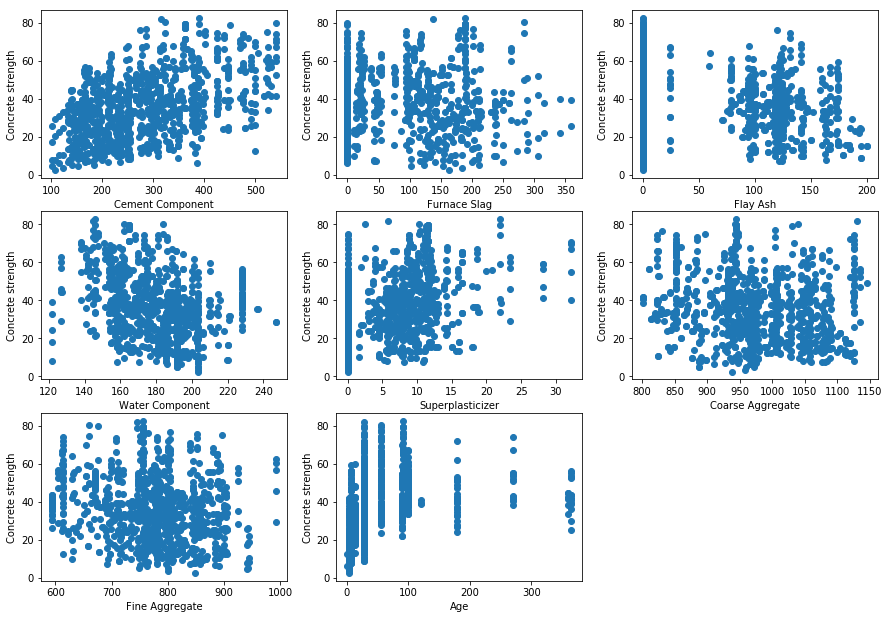

In [3]:
plt.figure(figsize=(15, 10.5))
plot_count = 1
for feature in list(data.columns)[:-1]:
    plt.subplot(3, 3, plot_count)
    plt.scatter(data[feature], data['concrete_strength'])
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Concrete strength')
    plot_count += 1
plt.show()

计算成对Pearson相关性

In [4]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = data.corr(method='pearson')
print(correlations)

                   cement_component  furnace_slag  flay_ash  water_component  superplasticizer  \
cement_component              1.000        -0.275    -0.397           -0.082             0.092   
furnace_slag                 -0.275         1.000    -0.324            0.107             0.043   
flay_ash                     -0.397        -0.324     1.000           -0.257             0.378   
water_component              -0.082         0.107    -0.257            1.000            -0.658   
superplasticizer              0.092         0.043     0.378           -0.658             1.000   
coarse_aggregate             -0.109        -0.284    -0.010           -0.182            -0.266   
fine_aggregate               -0.223        -0.282     0.079           -0.451             0.223   
age                           0.082        -0.044    -0.154            0.278            -0.193   
concrete_strength             0.498         0.135    -0.106           -0.290             0.366   

                   

计算所有特征之间的配对图

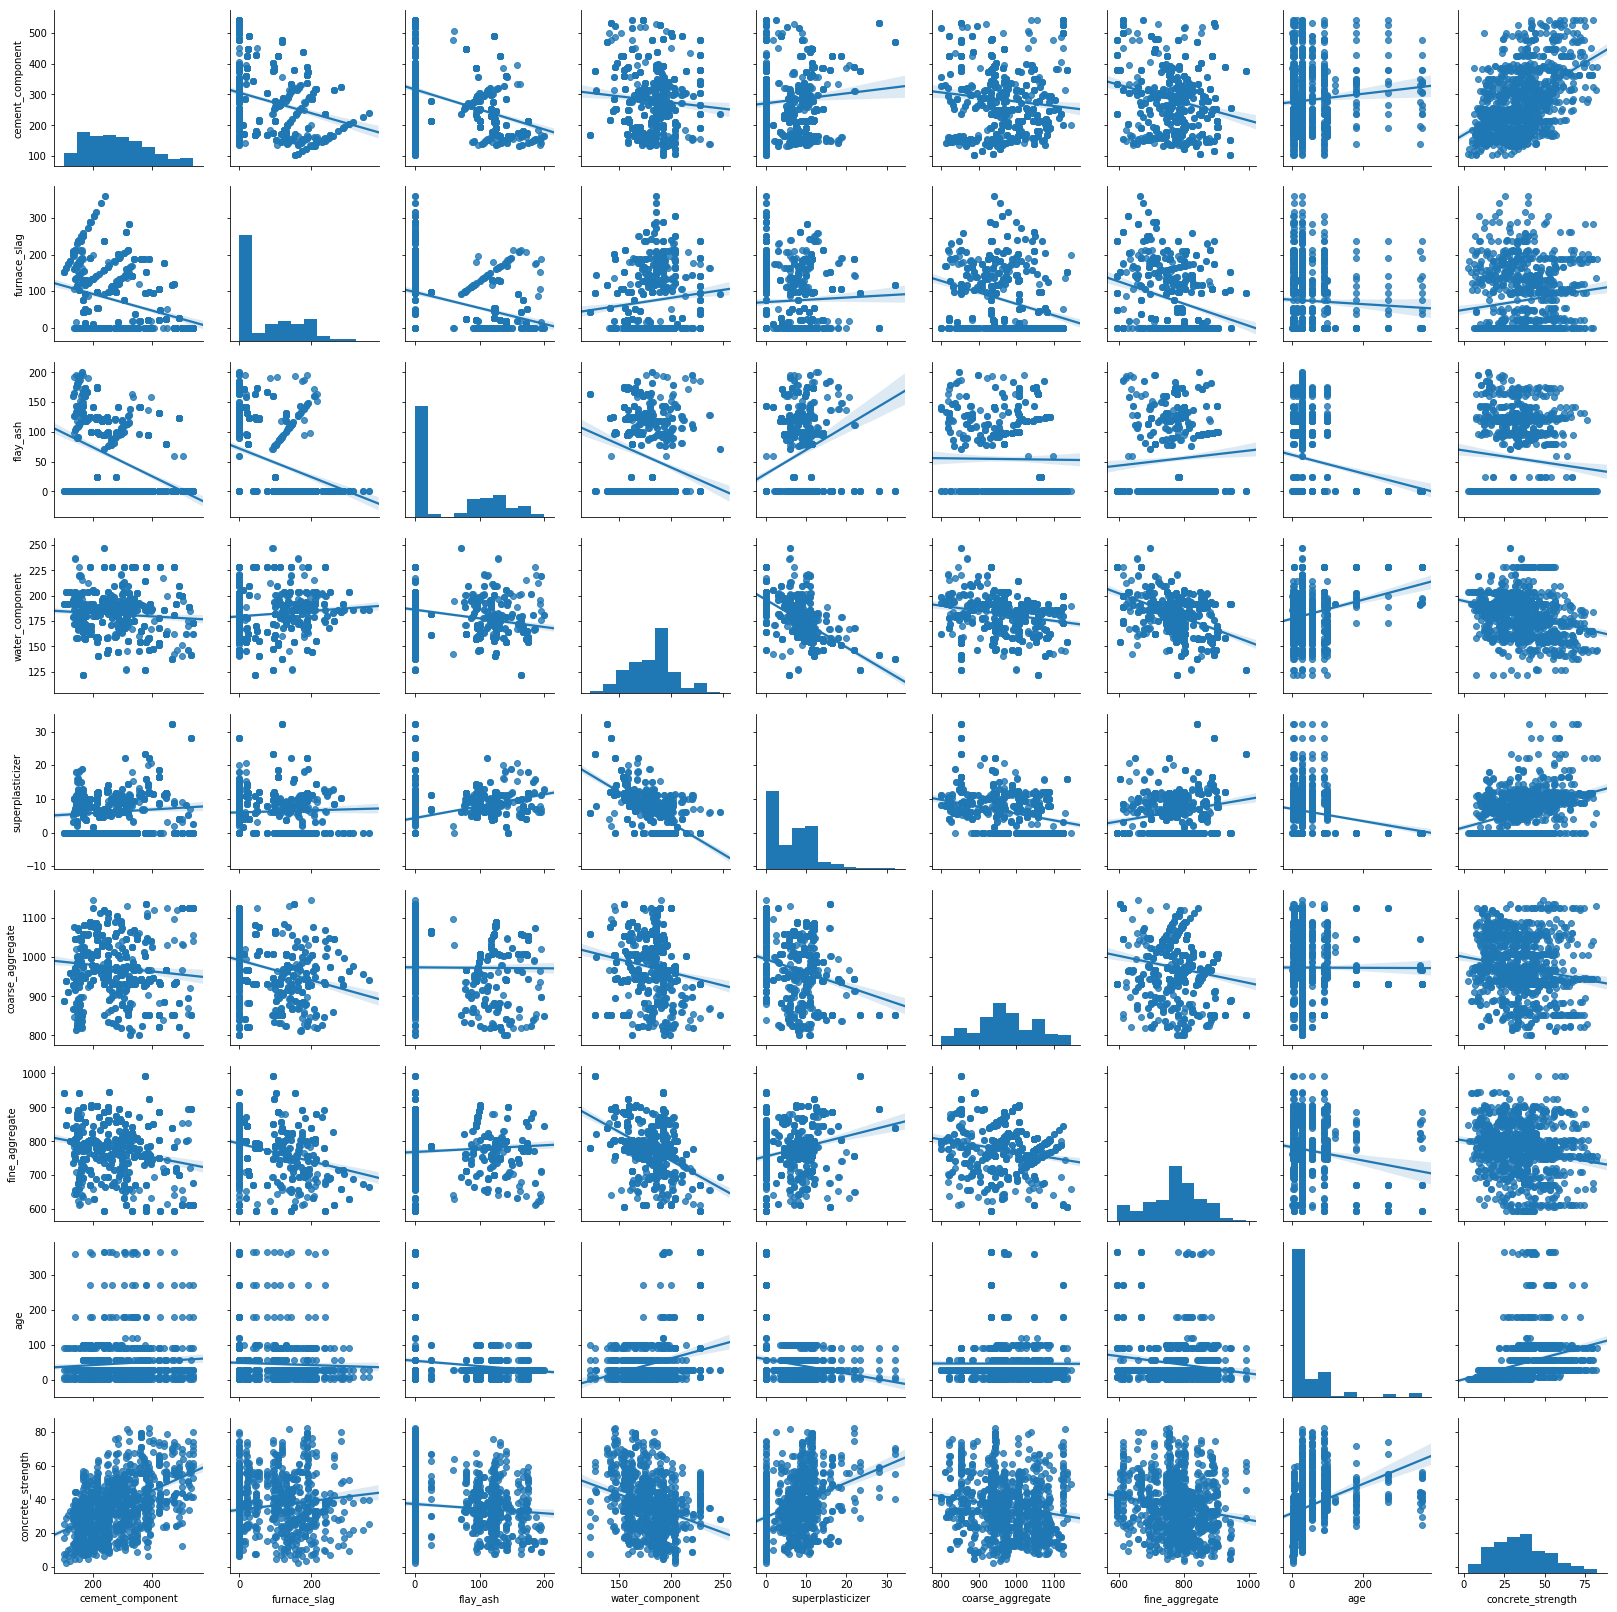

In [5]:
# 删除值为0的列中的记录
data_ = data[(data.T != 0).any()]
# Tidy (long-form) dataframe where each column is a variable and each row is an observation.
seaborn.pairplot(data_, vars=data.columns, kind='reg')
plt.show()

In [6]:
def split_train_test(data, feature, train_index=0.7):
    train, test = train_test_split(data, test_size=1-train_index)
    if type(feature) == list:
        x_train = train[feature].as_matrix()
        y_train = train['concrete_strength'].as_matrix()
        x_test = test[feature].as_matrix()
        y_test = test['concrete_strength'].as_matrix()
    else:
        x_train = [[x] for x in list(train[feature])]
        y_train = [[x] for x in list(train['concrete_strength'])]
        x_test = [[x] for x in list(test[feature])]
        y_test = [[x] for x in list(test['concrete_strength'])]
    return x_train, y_train, x_test, y_test

# Model

计算单一线性回归

cement_component 0.23299534792158405
flay_ash 0.05131190166819022
water_component 0.1271494374294927
superplasticizer 0.12104401377732399
coarse_aggregate 0.008301056730751655


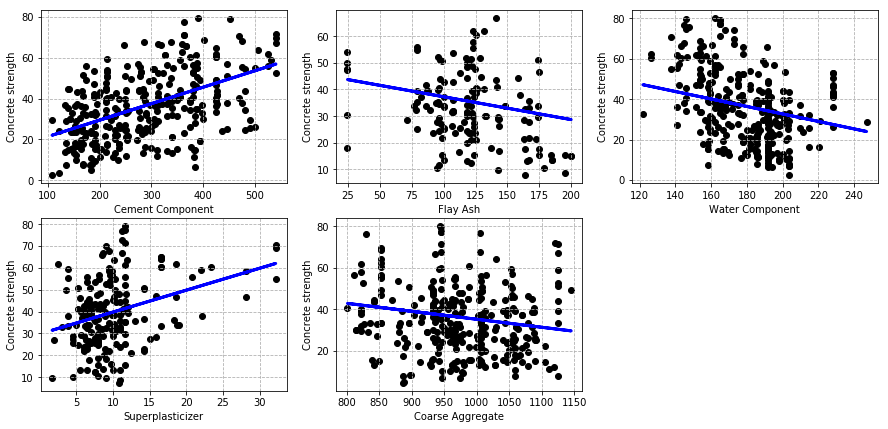

In [7]:
plt.figure(figsize=(15, 7))
plot_count = 1
for feature in ['cement_component', 'flay_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']:
    data_tr = data[['concrete_strength', feature]]
    data_tr = data_tr[(data_tr.T != 0).all()]
    x_train, y_train, x_test, y_test = split_train_test(data_tr, feature)
    regr = LinearRegression()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    plt.subplot(2, 3, plot_count)
    plt.scatter(x_test, y_test, color='black')
    plt.plot(x_test, y_pred, color='blue', linewidth=3)
    plt.grid(ls='--')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Concrete strength')
    print(feature, r2_score(y_test, y_pred))  # R^2值作为评价标准,越大越好
    plot_count += 1
plt.show()

计算多重线性回归

Features: ['cement_component', 'flay_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']
R2 score: 0.107437
Intercept: 91.016836
Coefficients: [ 0.04160177 -0.07602862 -0.17577045  0.19816819 -0.02631631]


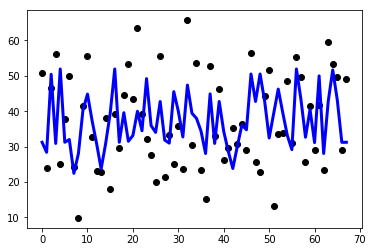

In [8]:
features = ['cement_component', 'flay_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']
data_tr = data
data_tr = data_tr[(data_tr.T != 0).all()]
x_train, y_train, x_test, y_test = split_train_test(data_tr, features)
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(y_pred, color='blue', linewidth=3)
print('Features: %s' % str(features))
print('R2 score: %f' % r2_score(y_test, y_pred))
print('Intercept: %f' % regr.intercept_)        # 截距
print('Coefficients: %s' % str(regr.coef_))     # 斜率

计算多重岭回归

Features: ['cement_component', 'flay_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']
R2 score: 0.107440
Intercept: 91.016836
Coefficients: [ 0.04160177 -0.07602862 -0.17577045  0.19816819 -0.02631631]


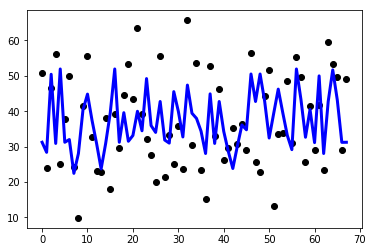

In [9]:
alphas = np.arange(0.1, 5, 0.1)
model = Ridge()
cv = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas)) # 尝试alpha值
y_pred = cv.fit(x_train, y_train).predict(x_test)
plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(y_pred, color='blue', linewidth=3)
print('Features: %s' % str(features))
print('R2 score: %f' % r2_score(y_test, y_pred))
print('Intercept: %f' % regr.intercept_)
print('Coefficients: %s' % str(regr.coef_))

计算多重套索回归

Features: ['cement_component', 'flay_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']
R2 score: 0.108299
Intercept: 91.016836
Coefficients: [ 0.04160177 -0.07602862 -0.17577045  0.19816819 -0.02631631]


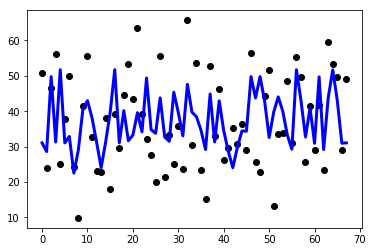

In [10]:
model = Lasso()
cv = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas)) # 尝试alpha值
y_pred = cv.fit(x_train, y_train).predict(x_test)
plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(y_pred, color='blue', linewidth=3)
print('Features: %s' % str(features))
print('R2 score: %f' % r2_score(y_test, y_pred))
print('Intercept: %f' % regr.intercept_)
print('Coefficients: %s' % str(regr.coef_))

计算多个ElasticNet回归

Features: ['cement_component', 'flay_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']
R2 score: 0.108714
Intercept: 91.016836
Coefficients: [ 0.04160177 -0.07602862 -0.17577045  0.19816819 -0.02631631]


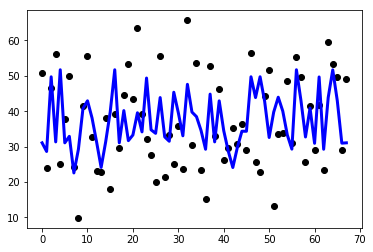

In [11]:
model = ElasticNet()
cv = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas)) # 尝试alpha值
y_pred = cv.fit(x_train, y_train).predict(x_test)
plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(y_pred, color='blue', linewidth=3)
print('Features: %s' % str(features))
print('R2 score: %f' % r2_score(y_test, y_pred))
print('Intercept: %f' % regr.intercept_)
print('Coefficients: %s' % str(regr.coef_))

计算单梯度boosting回归

cement_component 0.25424576603852067
flay_ash 0.07841314650587272
water_component 0.2874272294795409
superplasticizer 0.0894285726070021
coarse_aggregate 0.23580266349723777


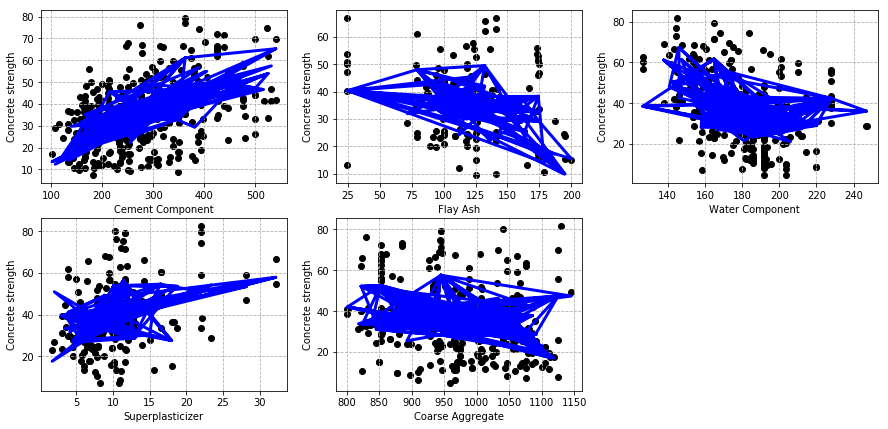

In [12]:
plt.figure(figsize=(15, 7))
plot_count = 1
for feature in ['cement_component', 'flay_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']:
    data_tr = data[['concrete_strength', feature]]
    data_tr = data_tr[(data_tr.T != 0).all()]
    x_train, y_train, x_test, y_test = split_train_test(data_tr, feature)
    regr = GradientBoostingRegressor()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    plt.subplot(2, 3, plot_count)
    plt.scatter(x_test, y_test, color='black')
    plt.plot(x_test, y_pred, color='blue', linewidth=3)
    plt.grid(ls='--')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Concrete strength')
    print(feature, r2_score(y_test, y_pred))  # R^2值作为评价标准,越大越好
    plot_count += 1
plt.show()

计算多梯度boosting回归

Features: ['cement_component', 'flay_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']
R2 score: 0.037853


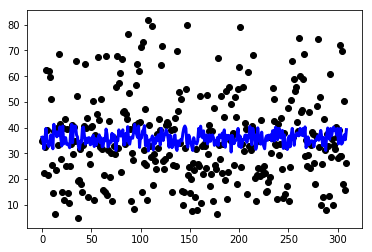

In [13]:
model = GradientBoostingRegressor()
y_pred = cv.fit(x_train, y_train).predict(x_test)
plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(y_pred, color='blue', linewidth=3)
print('Features: %s' % str(features))
print('R2 score: %f' % r2_score(y_test, y_pred))

用线性核函数计算单支持向量回归

cement_component 0.23789303679220164
flay_ash -0.03788852230393447
water_component 0.06603703109089842
superplasticizer 0.053924868873585274
coarse_aggregate 0.03915665576983418


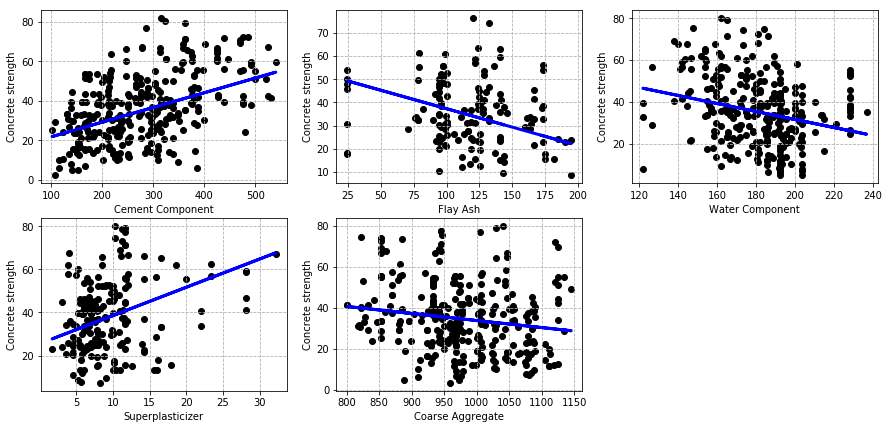

In [14]:
plt.figure(figsize=(15, 7))
plot_count = 1
for feature in ['cement_component', 'flay_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']:
    data_tr = data[['concrete_strength', feature]]
    data_tr = data_tr[(data_tr.T != 0).all()]
    x_train, y_train, x_test, y_test = split_train_test(data_tr, feature)
    regr = SVR(kernel='linear')
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    plt.subplot(2, 3, plot_count)
    plt.scatter(x_test, y_test, color='black')
    plt.plot(x_test, y_pred, color='blue', linewidth=3)
    plt.grid(ls='--')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Concrete strength')
    print(feature, r2_score(y_test, y_pred))  # R^2值作为评价标准,越大越好
    plot_count += 1
plt.show()

用线性核函数计算多支持向量回归

Features: ['cement_component', 'flay_ash', 'water_component', 'superplasticizer', 'coarse_aggregate']
R2 score: 0.037198


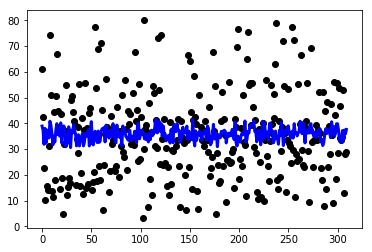

In [15]:
model = SVR(kernel='linear')
y_pred = cv.fit(x_train, y_train).predict(x_test)
plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(y_pred, color='blue', linewidth=3)
print('Features: %s' % str(features))
print('R2 score: %f' % r2_score(y_test, y_pred))

用水泥成分预测混凝土强度

In [16]:
feature = 'cement_component'
cc_new_data = np.array([213.5]).reshape(-1,1)
data_tr = data[['concrete_strength', feature]]
data_tr = data_tr[(data_tr.T != 0).all()]
x_train, y_train, x_test, y_test = split_train_test(data_tr, feature)
regr = GradientBoostingRegressor()
regr.fit(x_train, y_train)
cs_pred = regr.predict(cc_new_data)
print('Predicted value of concrete strength: %f' % cs_pred)

Predicted value of concrete strength: 37.525965


用水成分预测混凝土强度

In [17]:
feature = 'water_component'
cc_new_data = np.array([200]).reshape(-1,1)
data_tr = data[['concrete_strength', feature]]
data_tr = data_tr[(data_tr.T != 0).all()]
x_train, y_train, x_test, y_test = split_train_test(data_tr, feature)
regr = GradientBoostingRegressor()
regr.fit(x_train, y_train)
cs_pred = regr.predict(cc_new_data)
print('Predicted value of concrete strength: %f' % cs_pred)

Predicted value of concrete strength: 33.398677


用粗骨料预测混凝土强度

In [18]:
feature = 'coarse_aggregate'
cc_new_data = np.array([1000]).reshape(-1,1)
data_tr = data[['concrete_strength', feature]]
data_tr = data_tr[(data_tr.T != 0).all()]
x_train, y_train, x_test, y_test = split_train_test(data_tr, feature)
regr = GradientBoostingRegressor()
regr.fit(x_train, y_train)
cs_pred = regr.predict(cc_new_data)
print('Predicted value of concrete strength: %f' % cs_pred)

Predicted value of concrete strength: 32.903376
